In [1]:
#  Copyright 2022 Institute of Advanced Research in Artificial Intelligence (IARAI) GmbH.
#  IARAI licenses this file to You under the Apache License, Version 2.0
#  (the "License"); you may not use this file except in compliance with
#  the License. You may obtain a copy of the License at
#  http://www.apache.org/licenses/LICENSE-2.0
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.

In [2]:
import os
import sys

In [3]:
# Alternatevly, in order to make the module imports work properly set PYTHONPATH=$PWD before launching the notebook server from the repo root folder.
sys.path.insert(0, os.path.abspath("../"))  # noqa:E402

![t4c20logo](../t4c20logo.png)

In [4]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas
from IPython.core.display import HTML
from IPython.display import display
from matplotlib.patches import Rectangle
import t4c22
from t4c22.t4c22_config import load_basedir

In [5]:
%load_ext autoreload
%load_ext time
%autoreload 2
%autosave 60
%matplotlib inline

display(HTML("<style>.container { width:80% !important; }</style>"))

The time module is not an IPython extension.


Autosaving every 60 seconds


In [6]:
# load BASEDIR from file, change to your data root
BASEDIR = load_basedir(fn="t4c22_config.json", pkg=t4c22)

In [7]:
city = "london"
date = "2020-01-30"

## Nodes with counters and corresponding daily assigned counts

In [8]:
nodes = pandas.read_parquet(BASEDIR / "road_graph" / city / "road_graph_nodes.parquet")
counters = nodes[nodes["counter_info"] != ""]
counters

,node_id,counter_info,num_assigned,x,y
3,101818,01/285,1,-0.148104,51.535179
4,101831,02/065,1,-0.147044,51.535612
6,101839,02/077,1,-0.152666,51.537513
8,101843,01/225,1,-0.163682,51.534939
11,101870,01/557,1,-0.167320,51.529630
...,...,...,...,...,...
58525,2558111688715178165,5288,1,-0.286553,51.291753
58526,7889378430193093482,1069,1,-0.308409,51.295005
58527,2285140568209560452,4982,1,-0.014778,51.268887
58528,7056784350608841276,3216,1,-0.236904,51.262352


In [9]:
daily_counts = pandas.read_parquet(BASEDIR / "loop_counter" / city / "counters_daily_by_node.parquet")
daily_counts = daily_counts.reset_index()
daily_counts

,level_0,index,node_id,day,counter_info,num_assigned,volume
0,0,0,10028711,2019-07-01,[17/116],[1],"[56.0, 44.0, 40.0, 31.0, 28.0, 22.0, 24.0, 16...."
1,1,1,10028711,2019-07-02,[17/116],[1],"[42.0, 35.0, 26.0, 21.0, 37.0, 34.0, 13.0, 20...."
2,2,2,10028711,2019-07-03,[17/116],[1],"[36.0, 23.0, 33.0, 41.0, 32.0, 30.0, 20.0, 9.0..."
3,3,3,10028711,2019-07-04,[17/116],[1],"[33.0, 32.0, 30.0, 18.0, 18.0, 14.0, 21.0, 18...."
4,4,4,10028711,2019-07-05,[17/116],[1],"[49.0, 40.0, 42.0, 41.0, 28.0, 19.0, 23.0, 18...."
...,...,...,...,...,...,...,...
734801,734801,107666,996609828,2020-01-27,[09/376],[1],"[190.0, 188.0, 155.0, 120.0, 154.0, 144.0, nan..."
734802,734802,107667,996609828,2020-01-28,[09/376],[1],"[157.0, 154.0, 137.0, 141.0, 114.0, 103.0, 82...."
734803,734803,107668,996609828,2020-01-29,[09/376],[1],"[216.0, 204.0, 166.0, 165.0, 161.0, 116.0, 101..."
734804,734804,107669,996609828,2020-01-30,[09/376],[1],"[230.0, 177.0, 157.0, 202.0, 185.0, 124.0, 106..."


        level_0   index    node_id         day counter_info num_assigned  \
734804   734804  107669  996609828  2020-01-30     [09/376]          [1]   

                                                   volume  
734804  [230.0, 177.0, 157.0, 202.0, 185.0, 124.0, 106...  


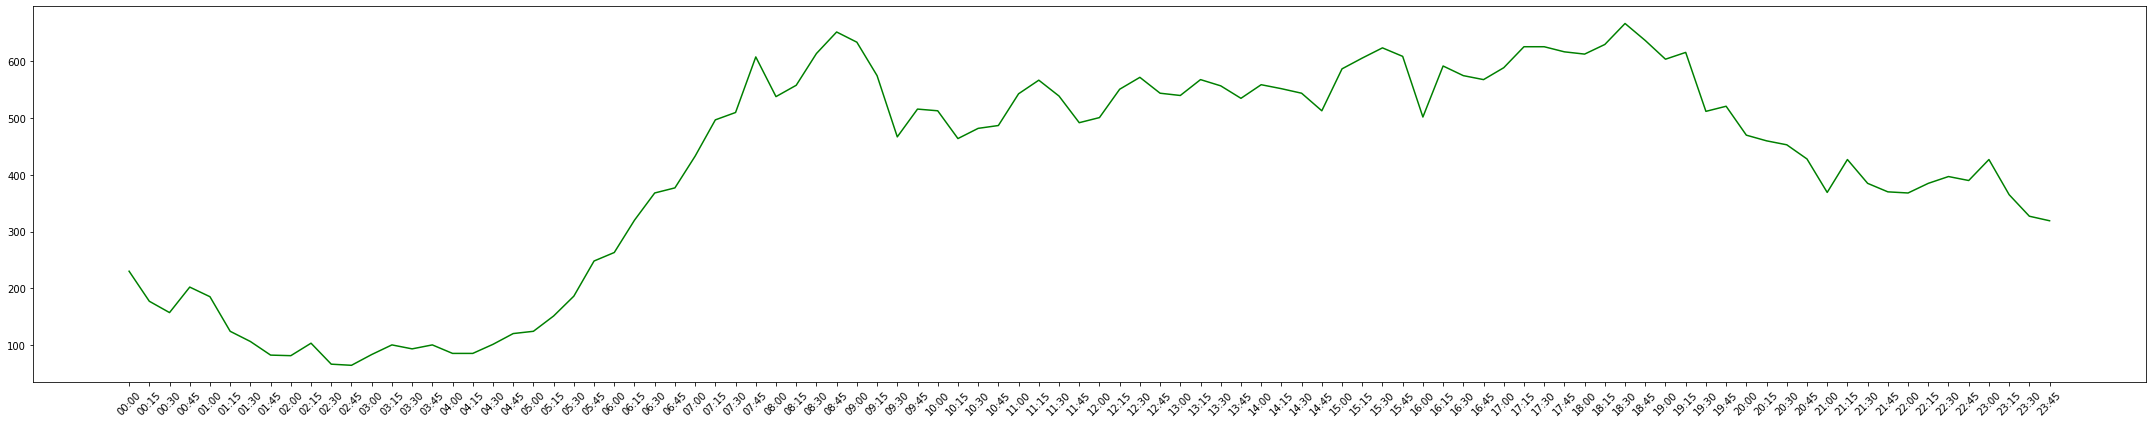

In [10]:
def plot_counter_dayline(data):
    dayline_labels = [datetime.time(hour=t // 4, minute=t % 4 * 15).isoformat(timespec="minutes") for t in range(96)]
    fig, ax1 = plt.subplots(figsize=(30, 6), tight_layout=True)
    ax1.tick_params(axis="x", labelrotation=45)
    ax1.plot(dayline_labels, data, color="green", label="volume")


def plot_counter_dayline_from_node_id(node_id):
    data = daily_counts[(daily_counts["node_id"] == str(node_id)) & (daily_counts["day"] == date)]
    data = list(data["volume"])[0]
    plot_counter_dayline(data)


def plot_counter_dayline_from_counter_id(counter_id):
    data = daily_counts[(daily_counts["counter_info"].astype(str) == f"['{counter_id}']") & (daily_counts["day"] == date)]
    print(data)
    data = list(data["volume"])[0]
    plot_counter_dayline(data)


# plot_counter_dayline_from_node_id(10028711)
plot_counter_dayline_from_counter_id("09/376")

## Edges and corresponding congestion classes
NOTE: u=from and v=to

In [11]:
edges = pandas.read_parquet(BASEDIR / "road_graph" / city / "road_graph_edges.parquet")
edges

,u,v,parsed_maxspeed,speed_kph,importance,highway,oneway,lanes,tunnel,length_meters,counter_distance
0,78112,25508583,32.2,32.2,0,unclassified,False,,,19.402386,6
1,78112,25508584,32.2,32.2,0,unclassified,False,,,63.881347,4
2,78112,3257621681005534125,32.2,32.2,0,residential,True,,,82.385612,5
3,99936,2146383887,32.2,32.2,0,unclassified,False,,,8.076410,1
4,99936,4544836433,32.2,32.2,0,unclassified,True,,,46.803240,0
...,...,...,...,...,...,...,...,...,...,...,...
132409,4595139612105786518,8842311879,35.1,35.1,0,residential,False,,,13.486853,4
132410,8230831116681660864,1149426165,35.1,35.1,0,residential,False,,,60.246550,9
132411,1688447984145568529,26559620,32.2,32.2,3,primary,True,2,,4.845324,1
132412,3771856370570656347,9402106041,20.0,20.0,0,unclassified,True,,,8.118341,2


In [12]:
cc = pandas.read_parquet(BASEDIR / "train" / city / "labels" / f"cc_labels_{date}.parquet")
cc

,u,v,day,t,cc
0,78112,25508583,2020-01-30,29,1
1,78112,25508583,2020-01-30,30,1
2,78112,25508583,2020-01-30,32,1
3,78112,25508583,2020-01-30,33,1
4,78112,25508583,2020-01-30,34,1
...,...,...,...,...,...
3792423,4890701424133264627,27596189,2020-01-30,90,1
3792424,4890701424133264627,27596189,2020-01-30,91,2
3792425,4890701424133264627,27596189,2020-01-30,92,1
3792426,4890701424133264627,27596189,2020-01-30,94,1


In [13]:
def plot_cc_dayline(dayline):
    red = dayline[3]
    yellow = dayline[2]
    green = dayline[1]
    unclassified = dayline[0]
    print(f"red {sum(red)}, yellow {sum(yellow)}, green {sum(green)}, unclassified {sum(unclassified)}")
    dayline_labels = [datetime.time(hour=t // 4, minute=t % 4 * 15).isoformat(timespec="minutes") for t in range(96)]
    fig, ax1 = plt.subplots(figsize=(30, 6), tight_layout=True)
    ax1.tick_params(axis="x", labelrotation=45)
    ax1.plot(dayline_labels, green, color="green", label="green")
    ax1.plot(dayline_labels, red, color="red", label="red")
    ax1.plot(dayline_labels, yellow, color="yellow", label="yellow")
    # ax1.plot(dayline_labels, unclassified, color="grey", label="unclassified")
    ax1.plot(dayline_labels, yellow + red + green, color="blue", label="total classified")

    fig, ax1 = plt.subplots(figsize=(30, 6), tight_layout=True)
    ax1.tick_params(axis="x", labelrotation=45)
    ax1.plot(dayline_labels, red, color="red", label="red")

In [14]:
cc_grouped = {(item["t"], item["cc"]): item["day"] for item in cc.groupby(["t", "cc"]).count().reset_index().to_dict("records")}
cc_grouped

{(0, 1): 11771,
 (0, 2): 2801,
 (0, 3): 806,
 (1, 1): 11551,
 (1, 2): 2606,
 (1, 3): 703,
 (2, 1): 10861,
 (2, 2): 2282,
 (2, 3): 675,
 (3, 1): 10251,
 (3, 2): 2087,
 (3, 3): 469,
 (4, 1): 9419,
 (4, 2): 2086,
 (4, 3): 447,
 (5, 1): 8262,
 (5, 2): 1762,
 (5, 3): 352,
 (6, 1): 8078,
 (6, 2): 1699,
 (6, 3): 309,
 (7, 1): 7673,
 (7, 2): 1567,
 (7, 3): 344,
 (8, 1): 6897,
 (8, 2): 1411,
 (8, 3): 312,
 (9, 1): 6518,
 (9, 2): 1357,
 (9, 3): 295,
 (10, 1): 6619,
 (10, 2): 1499,
 (10, 3): 377,
 (11, 1): 7025,
 (11, 2): 1524,
 (11, 3): 335,
 (12, 1): 7176,
 (12, 2): 1611,
 (12, 3): 275,
 (13, 1): 8720,
 (13, 2): 1893,
 (13, 3): 364,
 (14, 1): 9562,
 (14, 2): 2037,
 (14, 3): 340,
 (15, 1): 8747,
 (15, 2): 1829,
 (15, 3): 369,
 (16, 1): 9979,
 (16, 2): 2175,
 (16, 3): 360,
 (17, 1): 10757,
 (17, 2): 2188,
 (17, 3): 390,
 (18, 1): 11974,
 (18, 2): 2429,
 (18, 3): 468,
 (19, 1): 12941,
 (19, 2): 2745,
 (19, 3): 486,
 (20, 1): 14580,
 (20, 2): 3050,
 (20, 3): 500,
 (21, 1): 17427,
 (21, 2): 4095,
 (

In [15]:
cc_dayline = [np.array([cc_grouped.get((t, cc), 0) for t in range(96)]) for cc in range(4)]

red 416968, yellow 1355753, green 2019696, unclassified 0


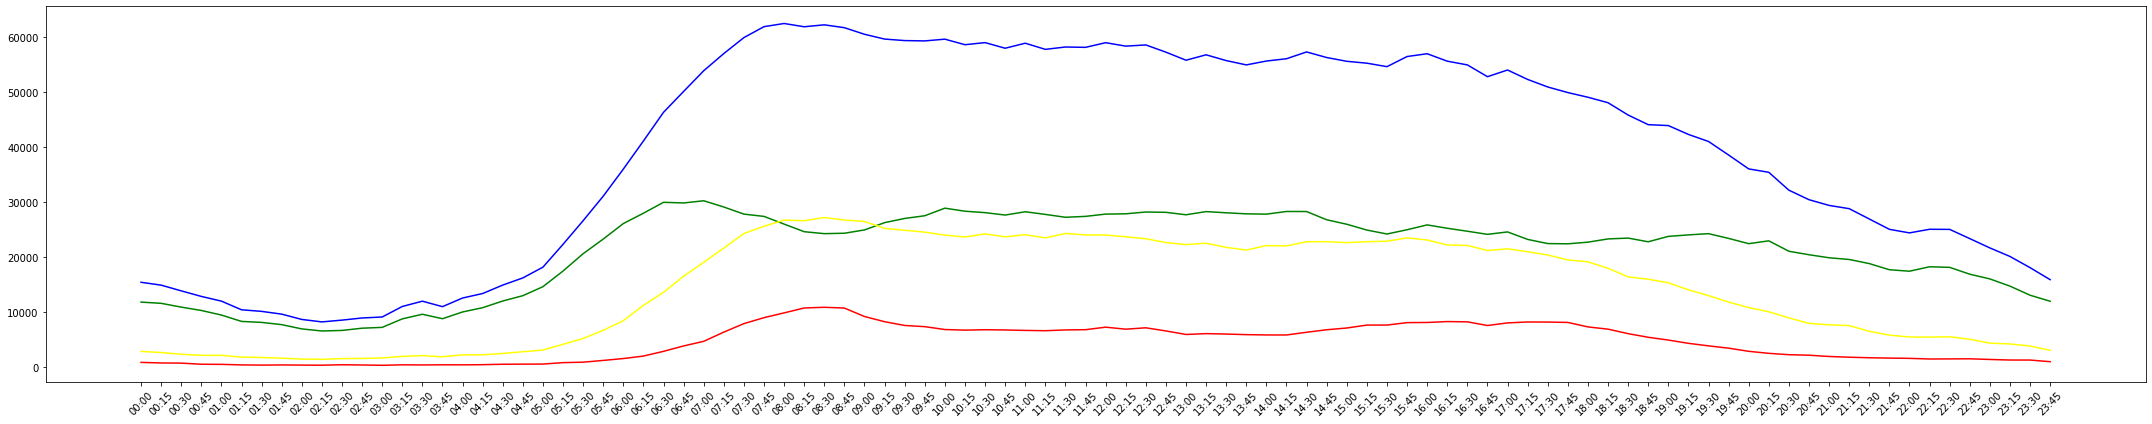

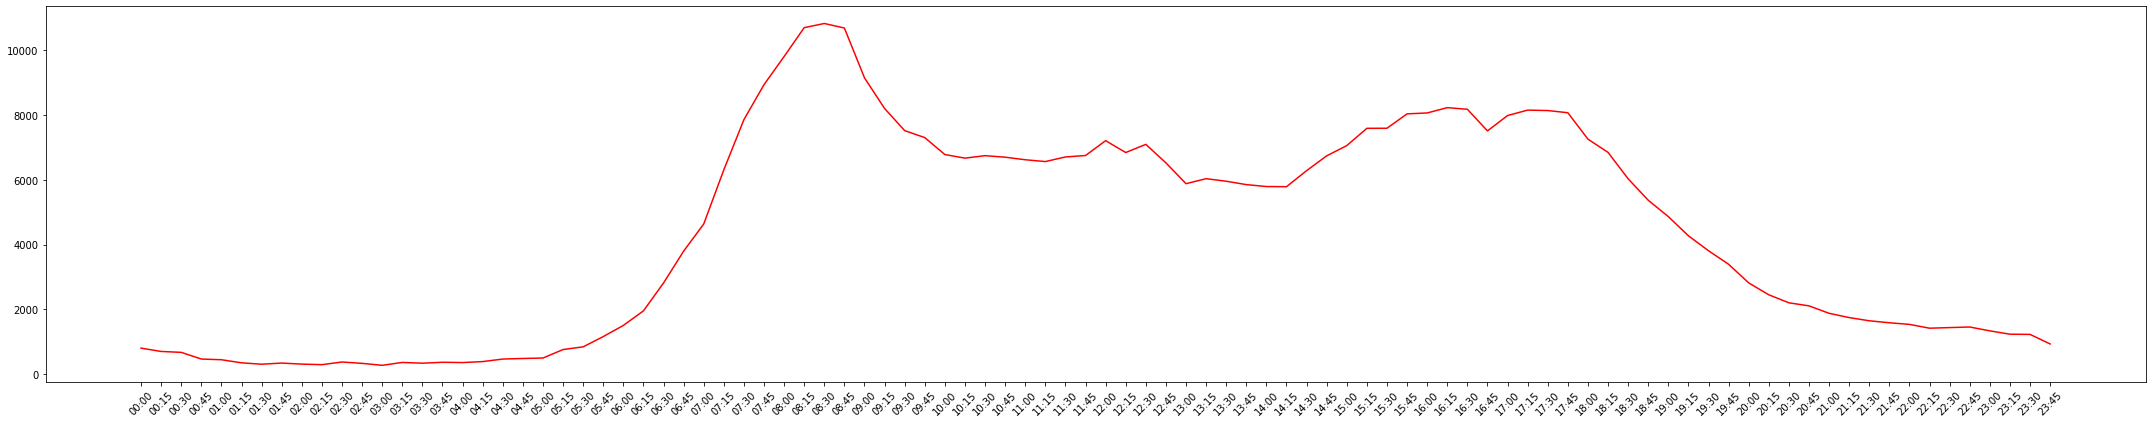

In [16]:
# cc_dayline
plot_cc_dayline(cc_dayline)

### CC Animation
<img src="cc_animation_small.gif" width="640">

### Inspect individual segments

In [17]:
dayline_labels = [datetime.time(hour=t // 4, minute=t % 4 * 15).isoformat(timespec="minutes") for t in range(96)]


def plot_segment_classifications_simple(df_directed, u, v, attention_timestamps=None):
    segment_classifictions = df_directed[(df_directed["u"] == u) & (df_directed["v"] == v)]
    fig, ax = plt.subplots(figsize=(50, 10), tight_layout=True)
    classified_timestamps = segment_classifictions["t"].to_numpy()
    classifications_at_timestamps = segment_classifictions["cc"].to_numpy()
    classifications_whole_day = np.zeros(96)
    classifications_whole_day[classified_timestamps] = classifications_at_timestamps
    ax.plot(dayline_labels, classifications_whole_day, linestyle="", marker="_")
    for t in range(96):
        cc = classifications_whole_day[t]
        if cc == 0:
            ax.add_patch(Rectangle((t, 0), 1, 1, fill=True, facecolor="grey"))
        elif cc == 1:
            ax.add_patch(Rectangle((t, 1), 1, 1, fill=True, facecolor="green"))
        elif cc == 2:
            ax.add_patch(Rectangle((t, 2), 1, 1, fill=True, facecolor="yellow"))
        elif cc == 3:
            ax.add_patch(Rectangle((t, 3), 1, 1, fill=True, facecolor="red"))
    if attention_timestamps is not None:
        ax.scatter([dayline_labels[l] for l in attention_timestamps], [0] * len(attention_timestamps), marker="x", color="red", s=500)
    ax.set_ylim([0, 4])
    return fig, ax

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

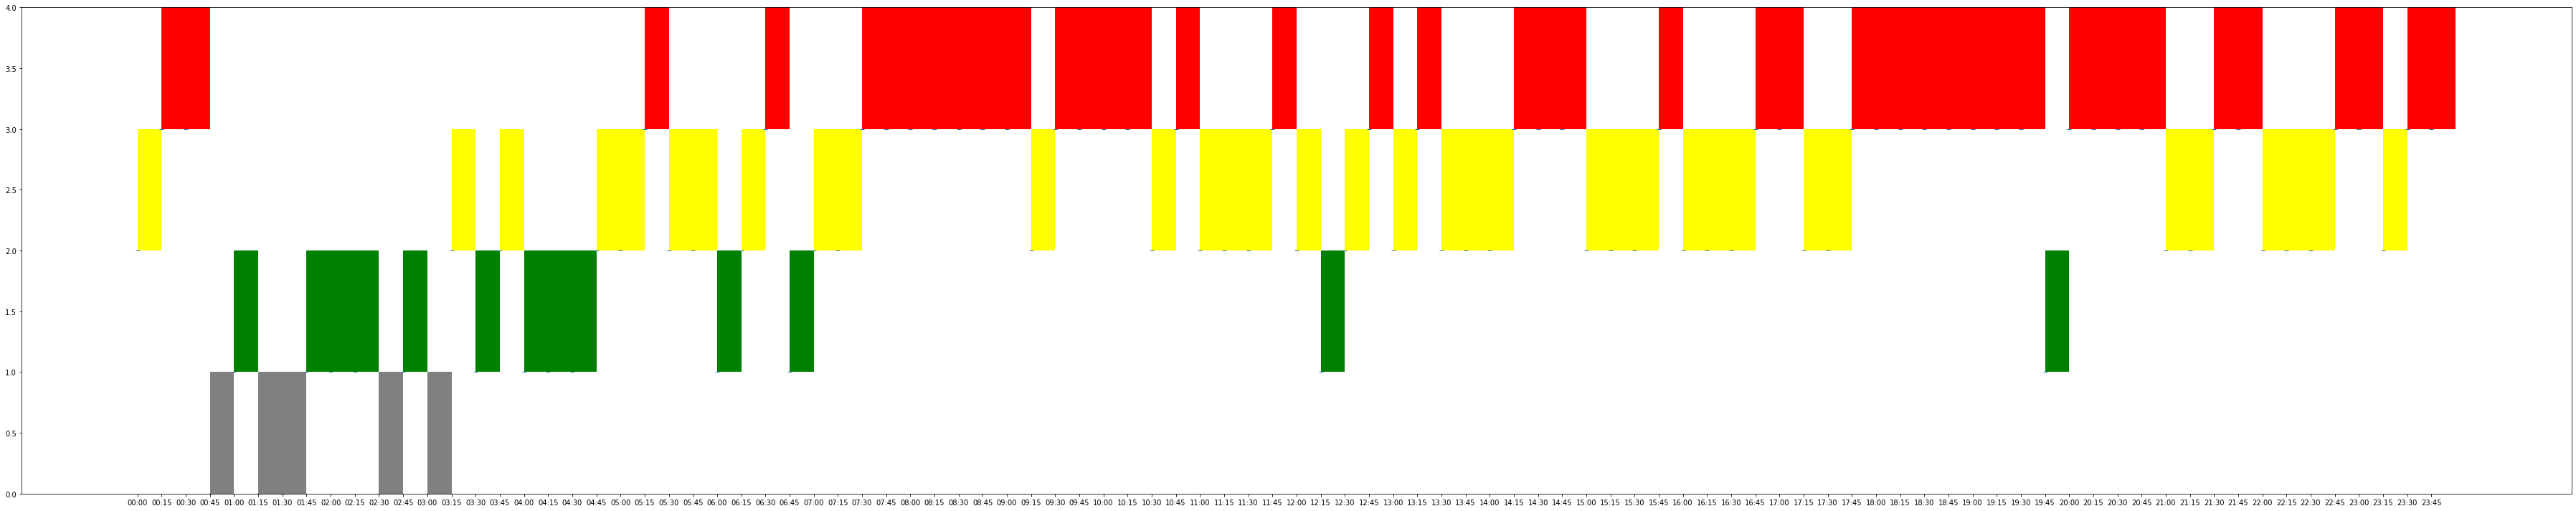

In [18]:
# London bridge, northbound
plot_segment_classifications_simple(cc, 3240063179, 6032044868)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

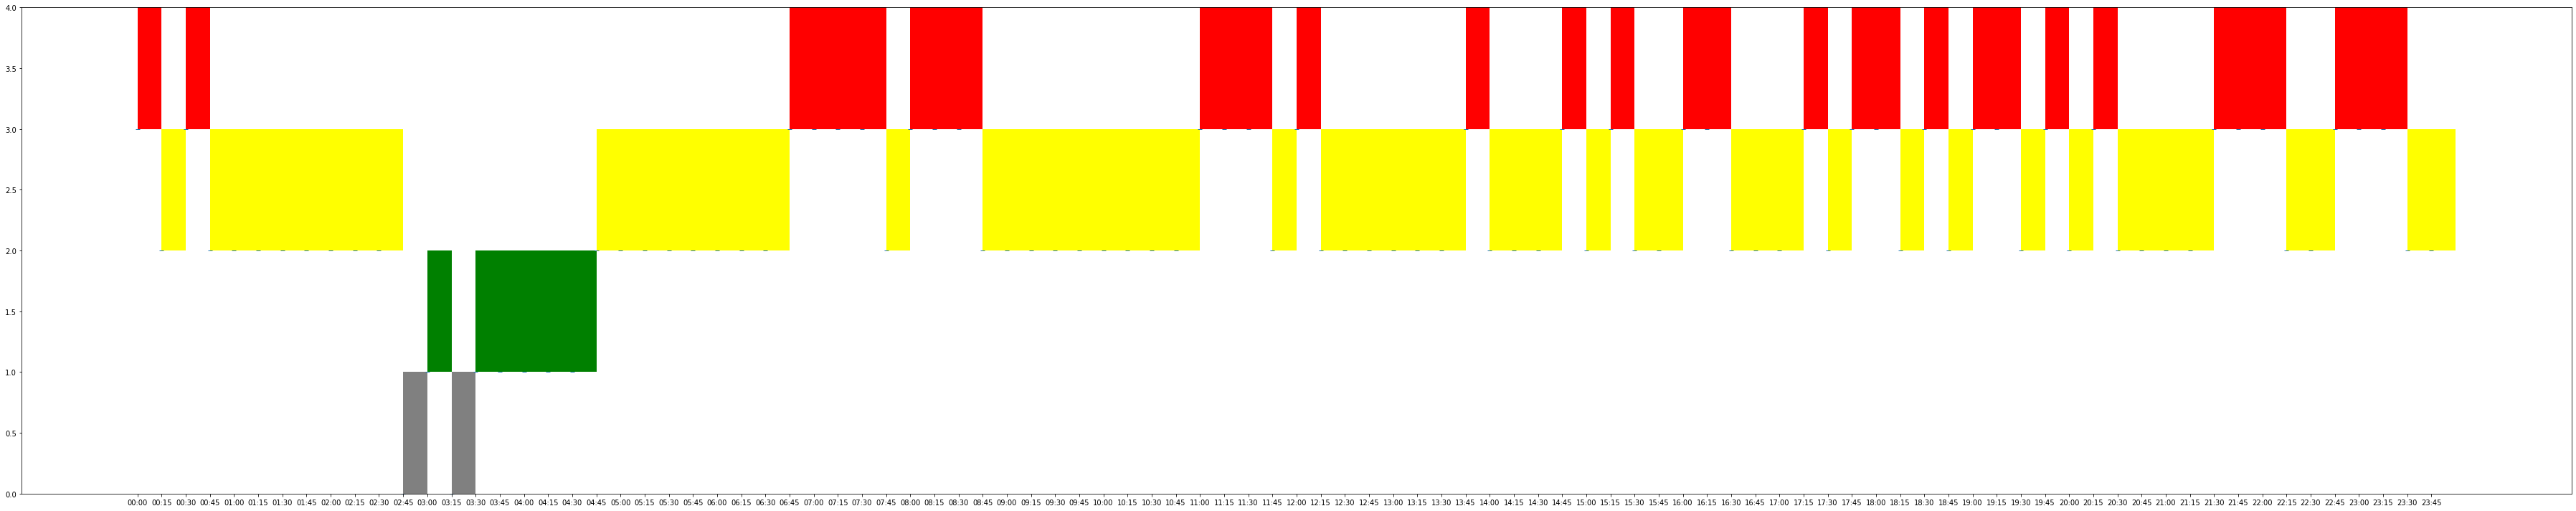

In [19]:
# Elephant and castle, northbound
plot_segment_classifications_simple(cc, 2180693488, 1868411754)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

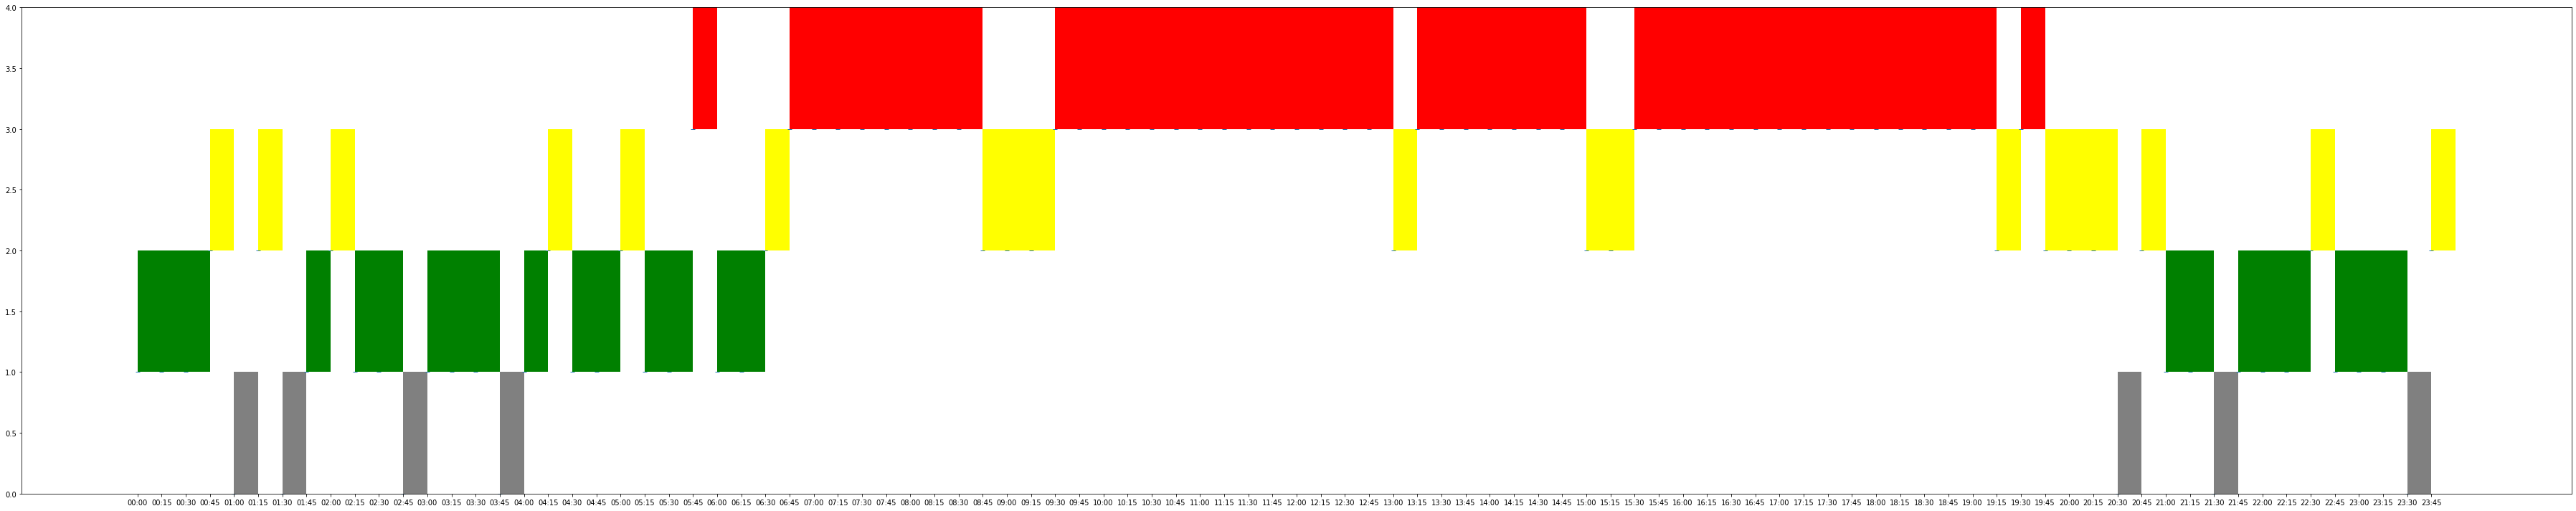

In [20]:
# Marleybone flyover, eastbound
plot_segment_classifications_simple(cc, 1178910690, 197630)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

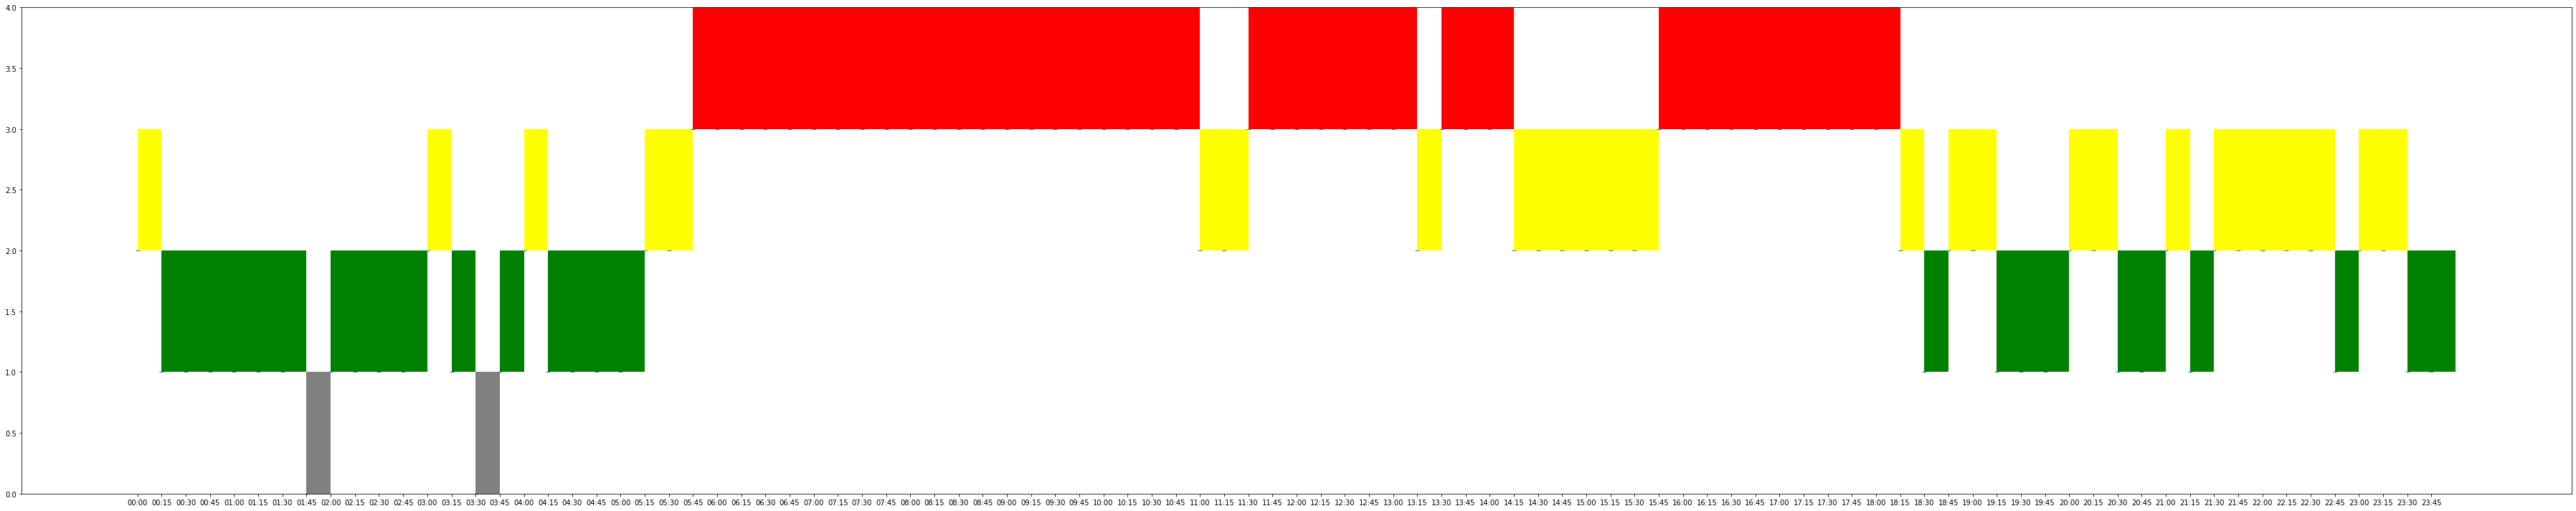

In [21]:
# M25 near Waltham, eastbound
plot_segment_classifications_simple(cc, 4737949241782541459, 5177230596161574999)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

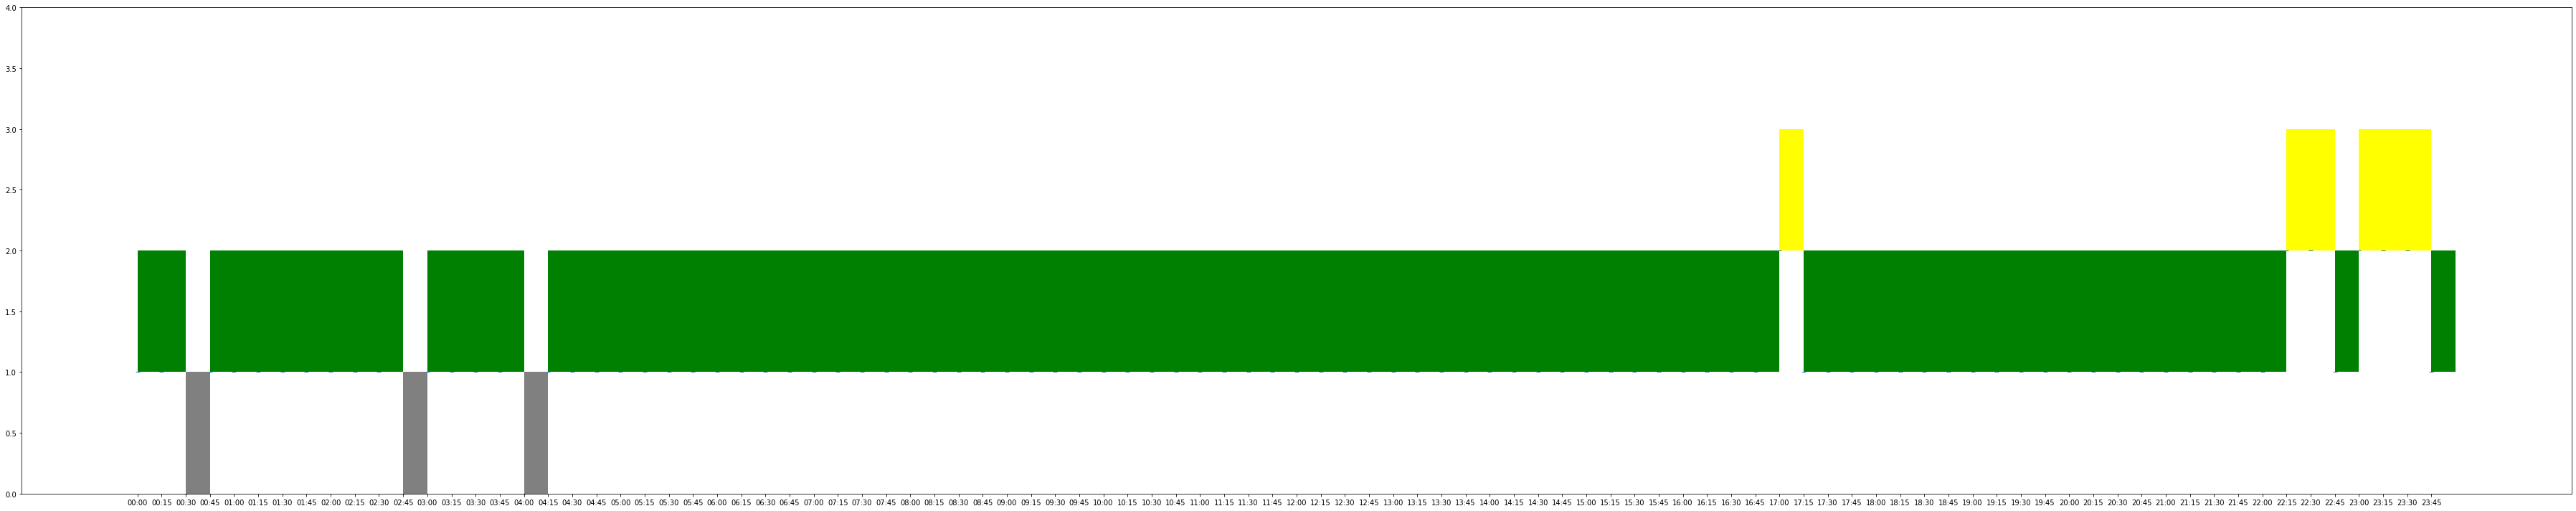

In [22]:
# M25 near Potters Bar, westbound
plot_segment_classifications_simple(cc, 8995114026285597218, 1967090893144364955)

### Explore the underlying speed data

In [23]:
sc = pandas.read_parquet(BASEDIR / "speed_classes" / city / f"speed_classes_{date}.parquet")
sc

,u,v,day,t,volume_class,median_speed_kph,free_flow_kph
0,78112,25508583,2020-01-30,29,3,40.941176,36.352941
1,78112,25508583,2020-01-30,30,5,43.607843,36.352941
2,78112,25508583,2020-01-30,32,5,35.764706,36.352941
3,78112,25508583,2020-01-30,33,3,33.882353,36.352941
4,78112,25508583,2020-01-30,34,5,37.411765,36.352941
...,...,...,...,...,...,...,...
3792423,4890701424133264627,27596189,2020-01-30,90,3,30.117647,29.882353
3792424,4890701424133264627,27596189,2020-01-30,91,5,20.823529,29.882353
3792425,4890701424133264627,27596189,2020-01-30,92,1,44.705882,29.882353
3792426,4890701424133264627,27596189,2020-01-30,94,1,24.470588,29.882353


In [24]:
def plot_segment_speeds_simple(df_directed, u, v):
    speed_classes = df_directed[(df_directed["u"] == u) & (df_directed["v"] == v)]
    fig, ax1 = plt.subplots(figsize=(50, 10), tight_layout=True)
    speed_timestamps = speed_classes["t"].to_numpy()
    speeds_at_timestamps = speed_classes["median_speed_kph"].to_numpy()
    speeds_whole_day = np.zeros(96)
    speeds_whole_day[speed_timestamps] = speeds_at_timestamps
    ax1.tick_params(axis="x", labelrotation=45)
    ax1.plot(dayline_labels, speeds_whole_day, color="green", label="volume")
    return fig, ax1

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

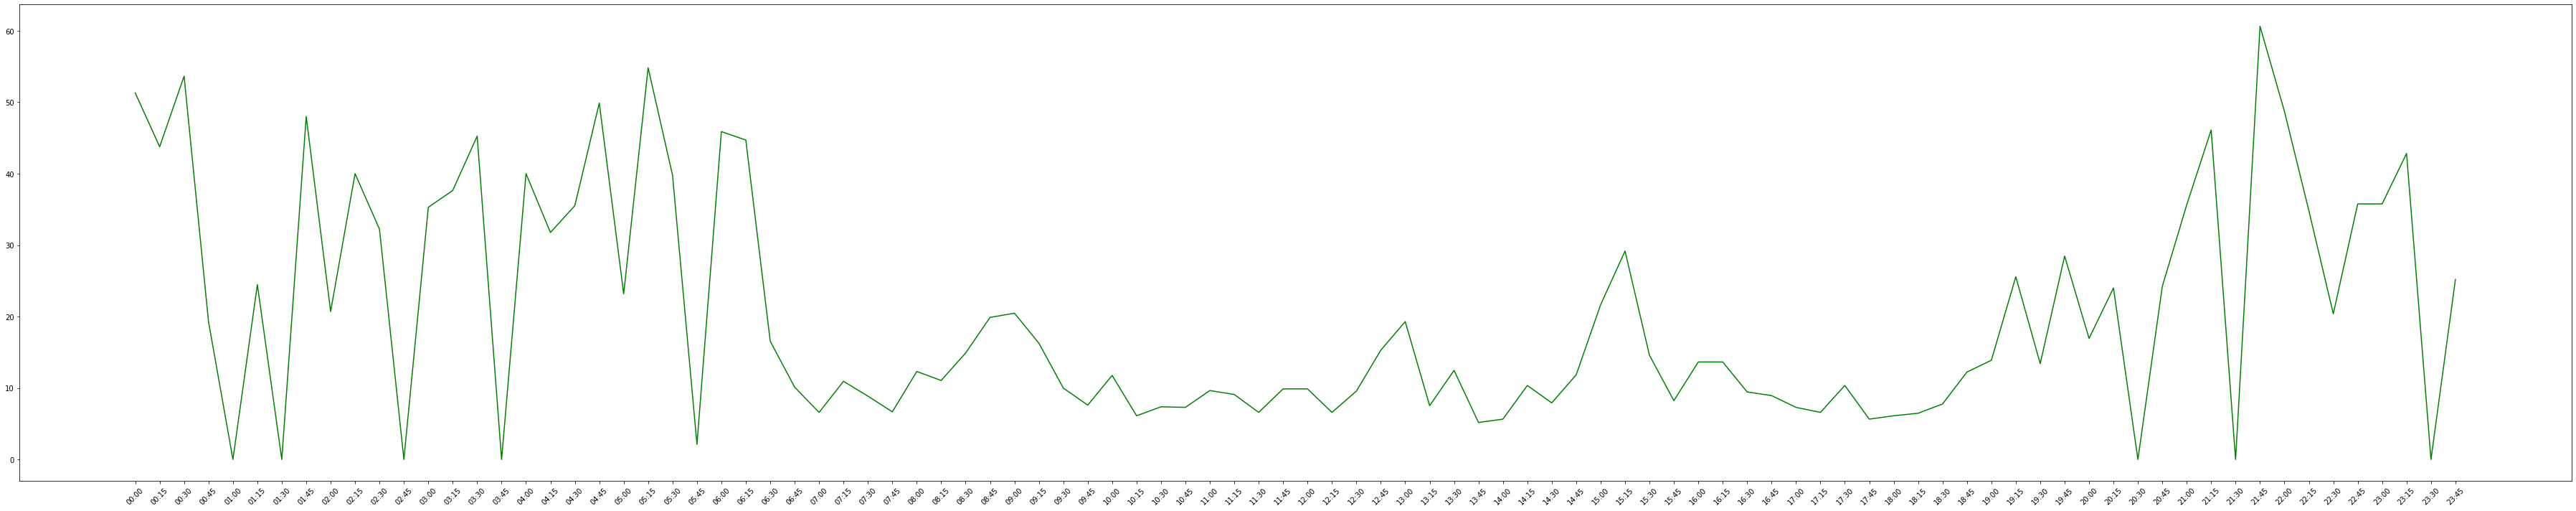

In [25]:
# Marleybone flyover, eastbound
plot_segment_speeds_simple(sc, 1178910690, 197630)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

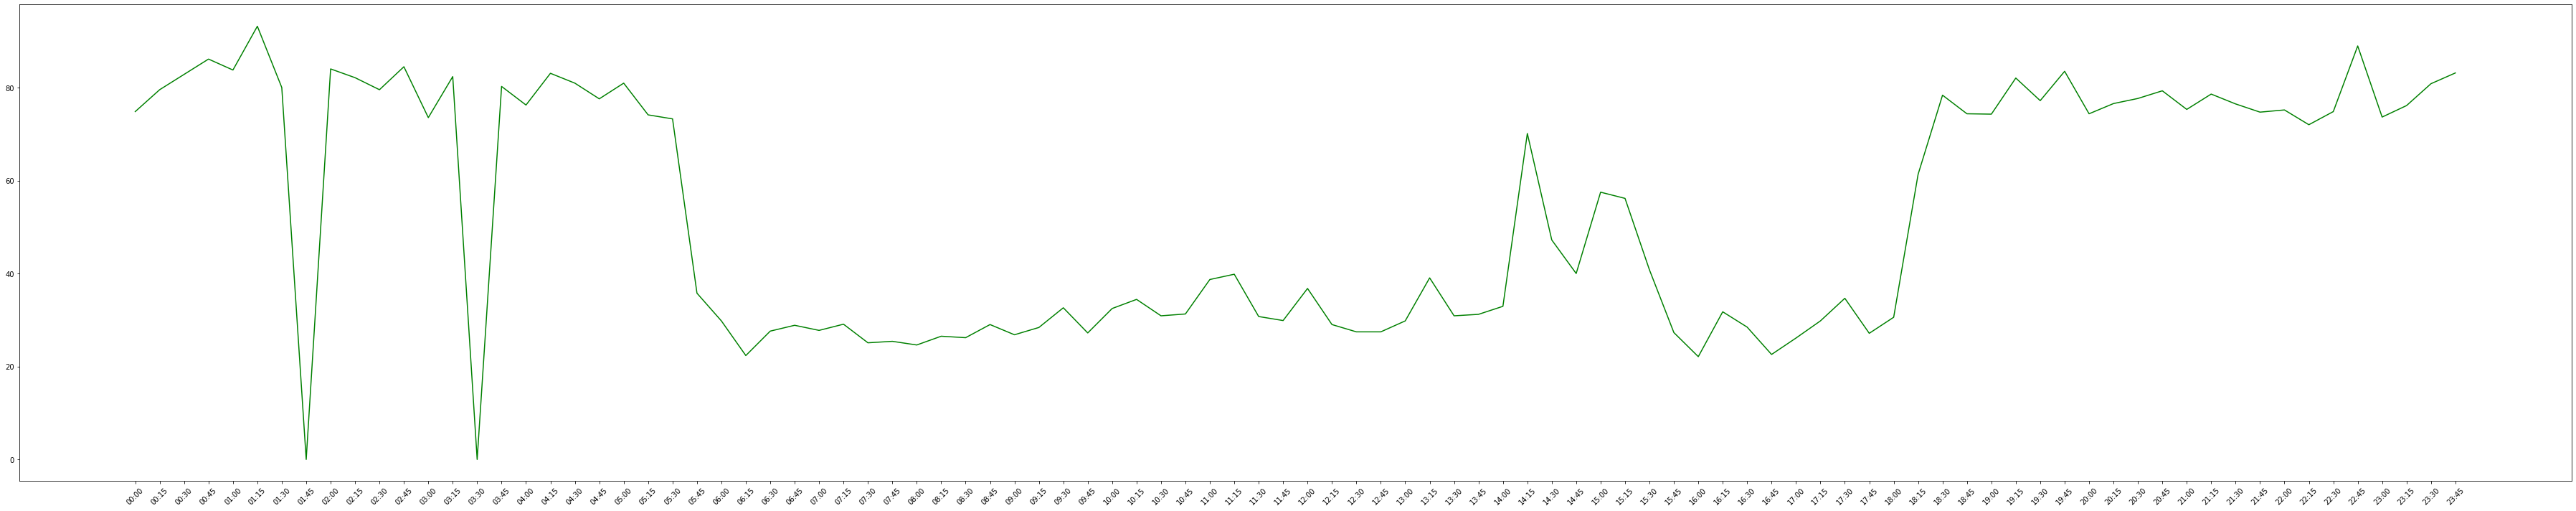

In [26]:
# M25 near Waltham, eastbound
plot_segment_speeds_simple(sc, 4737949241782541459, 5177230596161574999)

(<Figure size 3600x720 with 1 Axes>, <AxesSubplot:>)

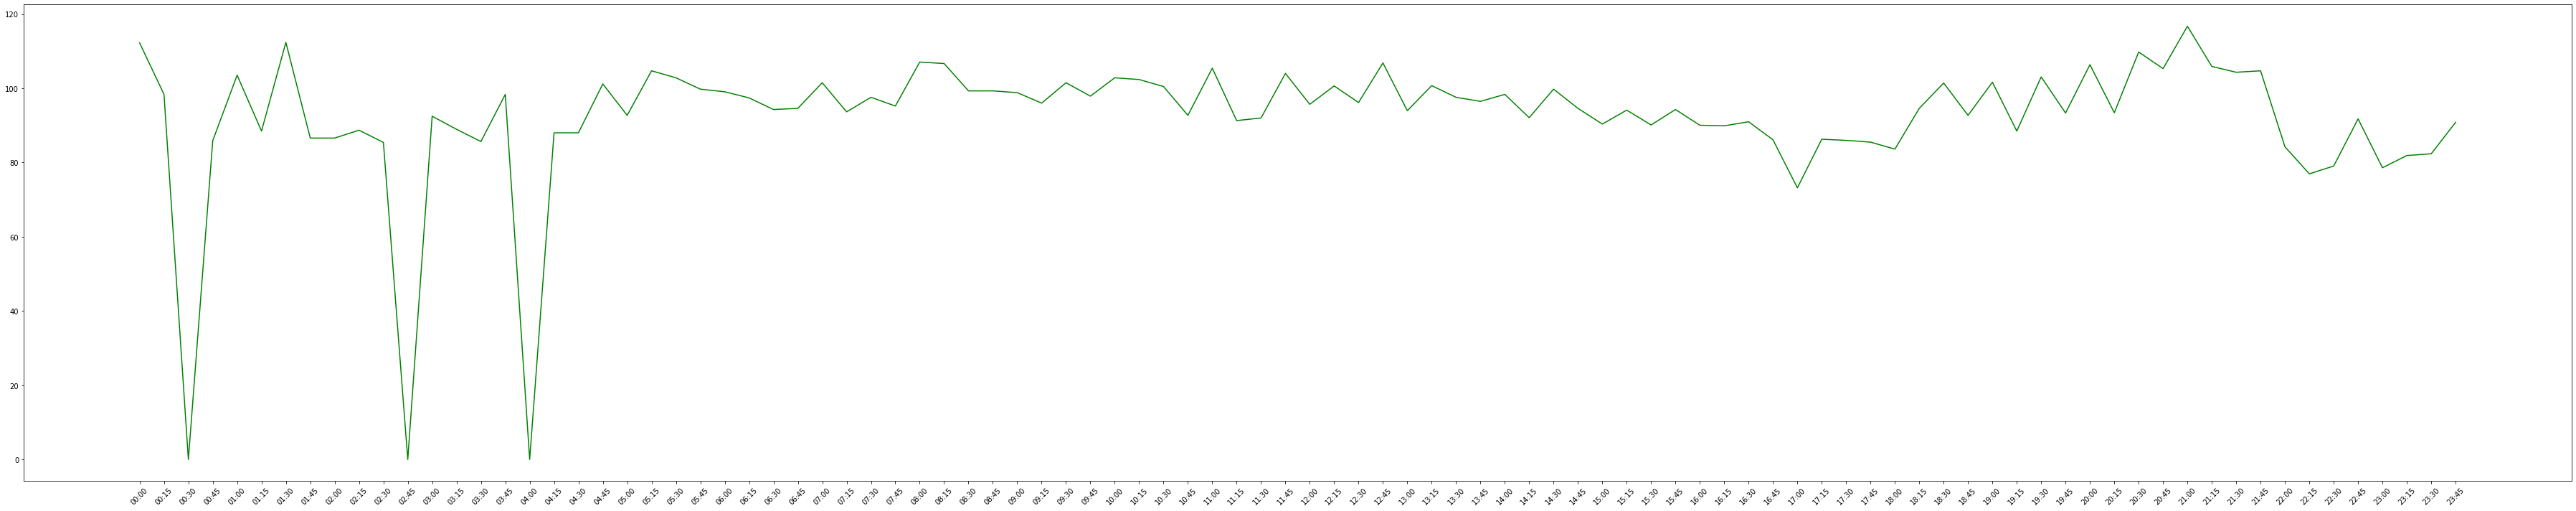

In [27]:
# M25 near Potters Bar, westbound
plot_segment_speeds_simple(sc, 8995114026285597218, 1967090893144364955)